In [1]:
import numpy as np
import pylab as plt
import scipy.stats
from tqdm.notebook import tqdm
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity
from tqdm.notebook import tqdm

In [2]:
#Assumptions about the problem
N = 1000
sigma = 0.02
chi = np.linspace(0,1, N)
M = np.random.normal(loc=1,scale=sigma,size=N)

Let's draw histogram of M with Scott's rule

Text(0.5, 0, 'M')

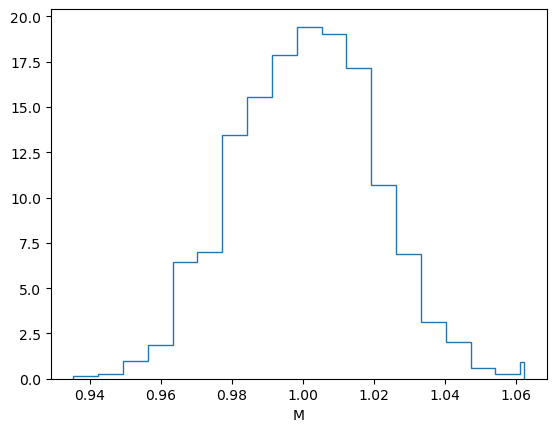

In [3]:
Scott_step = (3.5*sigma)/(N**(1/3))
Scott_bins = np.append(np.arange(start = M.min(),stop = M.max(), step = Scott_step),M.max()) 


plt.hist(M,density = True, bins= Scott_bins, histtype='step');
plt.xlabel("M")

Let's draw histogram of M_irr with Scott's rule

  0%|          | 0/1000 [00:00<?, ?it/s]

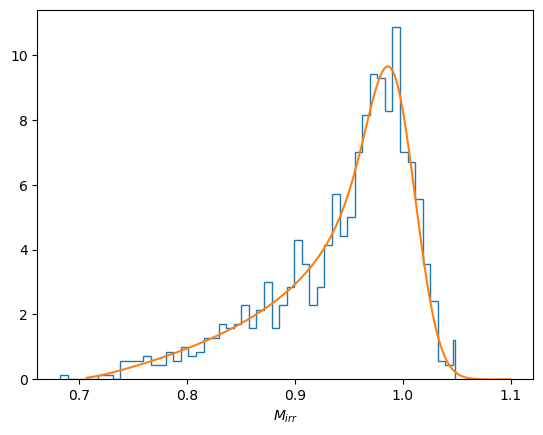

In [4]:
x = np.linspace(1/np.sqrt(2),1+5*sigma,N)

def M_irr(m, spin):
    return m*((1+(1-spin**2)**0.5)/2)**0.5

Mirr = M_irr(M,chi)

Scott_step = (3.5*sigma)/(N**(1/3))
Scott_bins = np.append(np.arange(start = M_irr(M,chi).min(),stop = M_irr(M,chi).max(), step = Scott_step),M_irr(M,chi).max()) 


plt.hist(Mirr, density = True, bins= Scott_bins, histtype='step');
plt.xlabel("$M_{irr}$")

def integrand(f,x):
    return ((2/np.pi)**0.5 / sigma ) * np.exp(-(x/f -1)**2 /(2*sigma**2)) * (2*f**2-1)/(1 - f**2)**0.5 / f


Mirr_int = [scipy.integrate.quad(lambda f: integrand(f,xt), 1/2**0.5,1)[0] for xt in tqdm(x)]
plt.plot(x,Mirr_int)

Let's draw histogram of $f(\chi)$ with Scott's rule

Text(0.5, 0, '$f$')

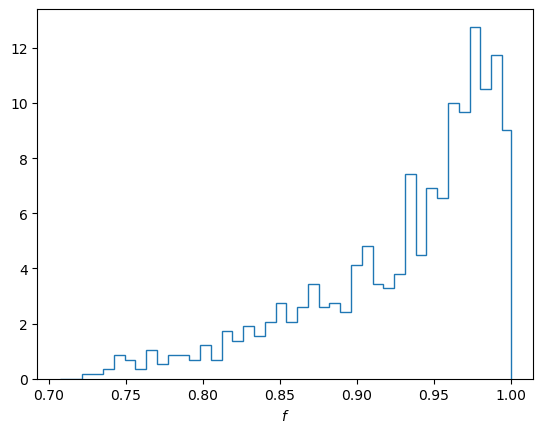

In [5]:
def littlef(spin):
    return ((1+(1-spin**2)**0.5)/2)**0.5

f = littlef(chi)

Scott_step = (3.5*sigma)/(N**(1/3))
Scott_bins = np.append(np.arange(start = littlef(chi).min(),stop = littlef(chi).max(), step = Scott_step),littlef(chi).max()) 


plt.hist(Mirr,density = True, bins= Scott_bins, histtype='step');
plt.xlabel("$f$")

### KDE representetion

Using the same samples, plot the distribution of $M_{irr}$ using a KDE.

  0%|          | 0/3 [00:00<?, ?it/s]

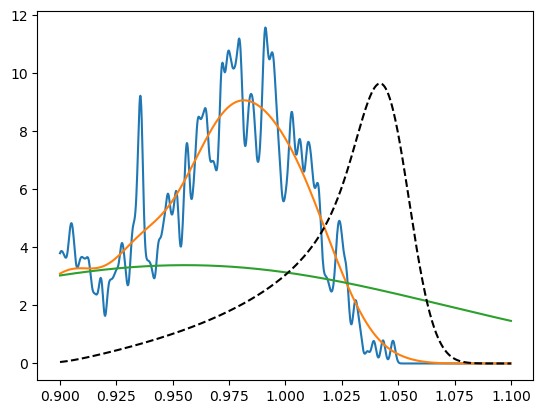

In [7]:
x = np.linspace(1-5*sigma,1+5*sigma,N)

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

for bandwidth in tqdm([0.001,0.01,0.1]):
    pdfM_irr = kde_sklearn(Mirr, bandwidth = bandwidth, kernel= "gaussian")

    plt.plot(x,pdfM_irr)

plt.plot(x,Mirr_int,c='black',ls='--')
